In [1]:
# This is a Jupyter Notebook that has all techniques used in GenerateImages.py
# To see what each technique does, this jupyer notebook will take an image and in input and you can perform each 
# on that image to visualize the changes. 

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import glob
import matplotlib
from matplotlib import pyplot as plt
import sklearn 
import skimage
from skimage import data, io, filters
from skimage.viewer import ImageViewer
import torch
from torchvision import transforms
import random
from scipy.stats import norm
import decimal

/home/deepthim/.local/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
# Take input to get the path to image
path = input()

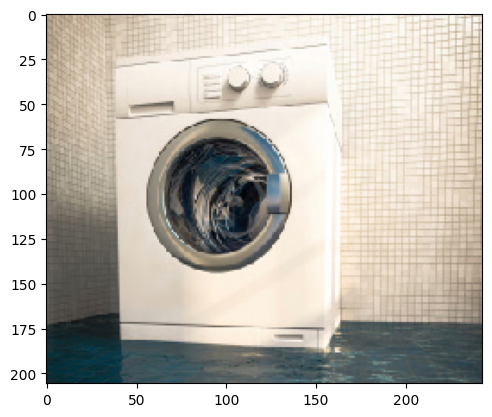

In [3]:
# Loading the image
image = matplotlib.pyplot.imread(path)
plt.imshow(image)
plt.show()

Vertically flipped image


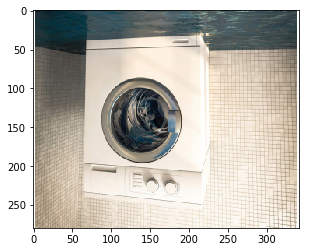

Horizontally flipped image


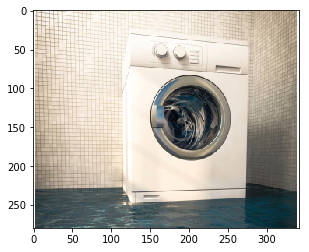

Vertically and horizontally flipped image


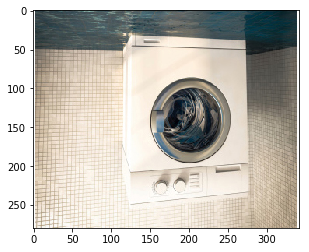

In [5]:
# Augmentation by flipping images
flip = cv2.flip(image, 0) # Flip an image vertically
print("Vertically flipped image")
plt.imshow(flip)
plt.show()

flip = cv2.flip(image, 1) # Flip an image horizontally
print("Horizontally flipped image")
plt.imshow(flip)
plt.show()    

flip = cv2.flip(image, -1) # Flip an image both vertically and horizontally
print("Vertically and horizontally flipped image")
plt.imshow(flip)
plt.show()    

Altered brightness 1


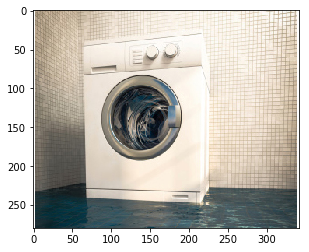

Altered brightness 2


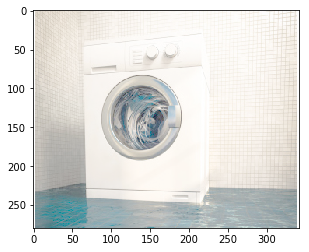

Altered brightness 3


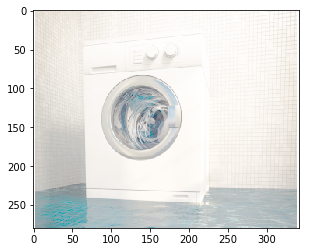

Altered brightness 4


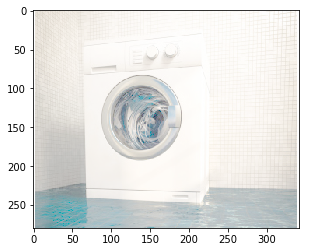

Altered brightness 5


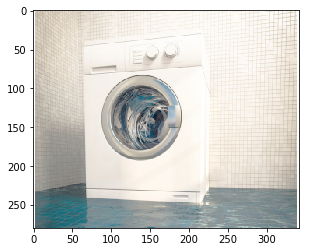

In [17]:
#  Changing brightness

for num in range (0, 7):
        gamma = float(decimal.Decimal(random.randrange(10, 500))/100)
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255
            for i in np.arange(0, 256)]).astype("uint8")
        bright = cv2.LUT(image, table)
        print("Altered brightness " + str(num + 1))
        plt.imshow(bright)
        plt.show()

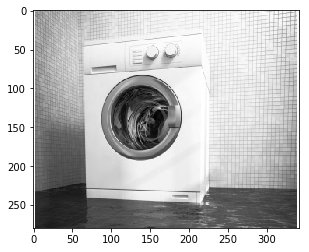

In [22]:
# Changing to black and white

gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

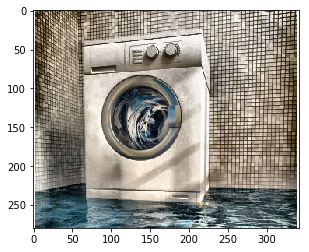

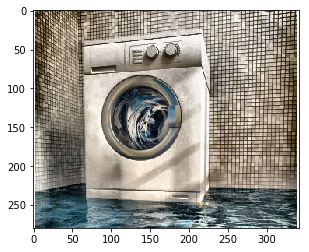

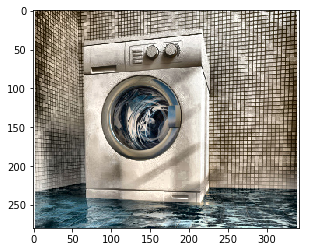

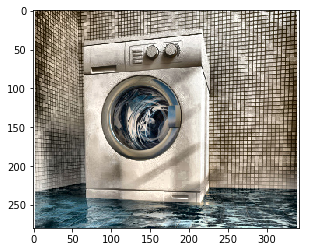

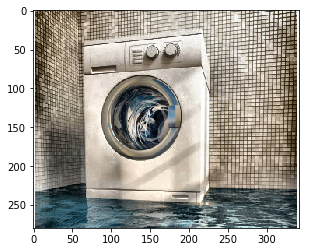

In [24]:
# Adjusting contrast

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

l, a, b = cv2.split(lab)

for num in range(0, 7):
    value = float(decimal.Decimal(random.randrange(10, 1000))/100)
    clahe = cv2.createCLAHE(clipLimit=value, tileGridSize=(8,8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl,a,b))

    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    plt.imshow(final)
    plt.show()


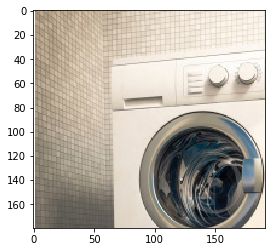

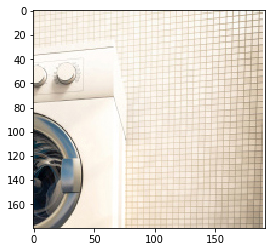

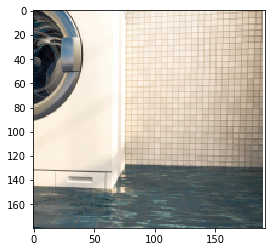

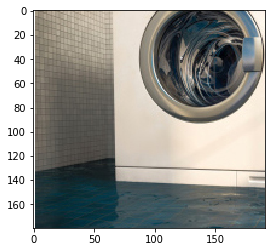

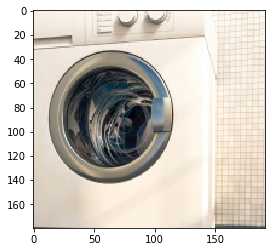

In [20]:
#Augmentation using cropping

crops = []

(h, w) = image.shape[:2]
width = w - 150
height = h - 100

coords = [
    [0, 0, width, height],
    [w - width, 0, w, height],
    [w - width, h - height, w, h],
    [0, h - height, width, h]]

dW = int(0.5 * (w - width))
dH = int(0.5 * (h - height))
coords.append([dW, dH, w - dW, h - dH])

for (startX, startY, endX, endY) in coords:
    crop = image[startY:endY, startX:endX]
    crop = cv2.resize(crop, (width, height), interpolation=cv2.INTER_AREA)
    crops.append(crop)

for c in crops:
    plt.imshow(c)
    plt.show()    

Original Image


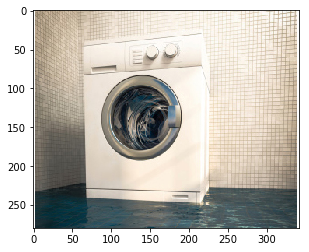

Blurred Image


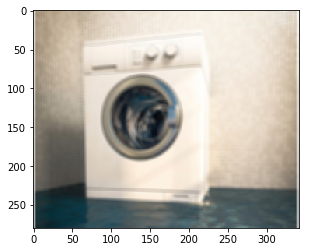

In [21]:
#Augmentation using blurring techniques

#Average blurring

blur = cv2.blur(image,(5,5))
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()

Original Image


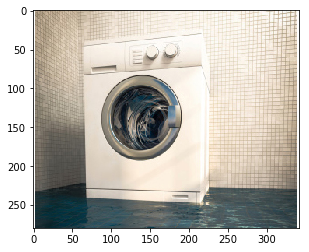

Blurred Image


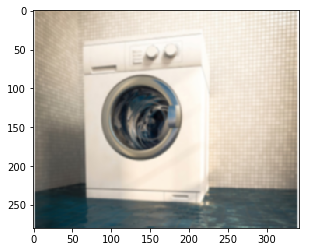

In [22]:
# Gaussian blur

blur = cv2.GaussianBlur(image,(5,5),0)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()

Original Image


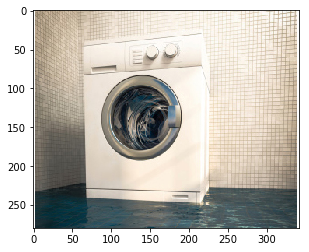

Blurred Image


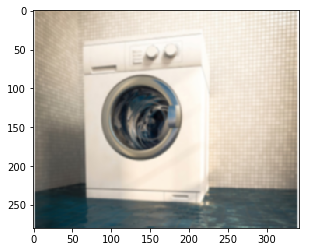

In [23]:
# Median Blur

median = cv2.medianBlur(image,5)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()

Original Image


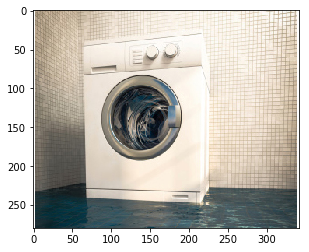

Blurred Image


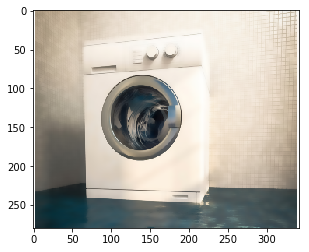

In [24]:
# Bilateral Filtering

blur = cv2.bilateralFilter(image,9,75,75)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()

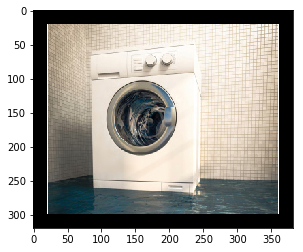

In [25]:
#Padding

dst = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT)
plt.imshow(dst)
plt.show()

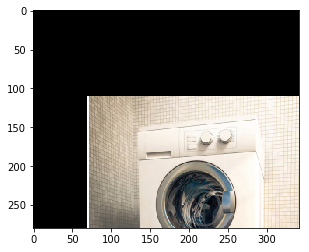

In [26]:
#Translation

num_rows, num_cols = image.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110]])
dst = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))
plt.imshow(dst)
plt.show()

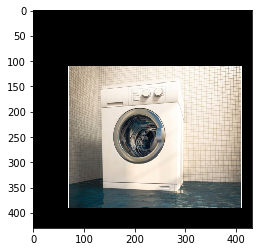

In [27]:
#Translation with lesser cropping

dst = cv2.warpAffine(image, translation_matrix, (num_cols + 90, num_rows + 150))
plt.imshow(dst)
plt.show()

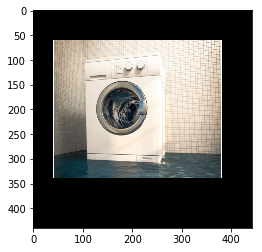

In [28]:
#Translation with image in the midddle of a bigger frame

dst = cv2.warpAffine(image, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
dst = cv2.warpAffine(dst, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
plt.imshow(dst)
plt.show()

Original Image


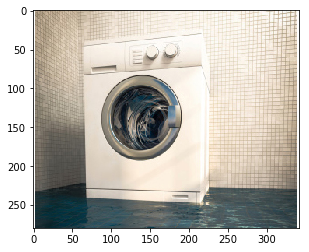

Histogram Equalized Image


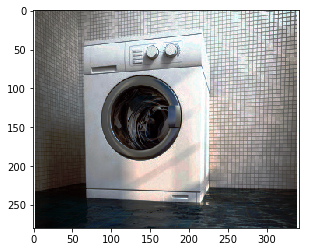

In [29]:
#Histogram Equalization
B, G, R = cv2.split(image)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
equalized = cv2.merge((B, G, R))
print("Original Image")
plt.imshow(image)
plt.show()
print("Histogram Equalized Image")
plt.imshow(equalized)
plt.show()

Original Image


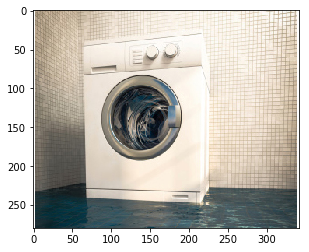

Histogram Equalized Image


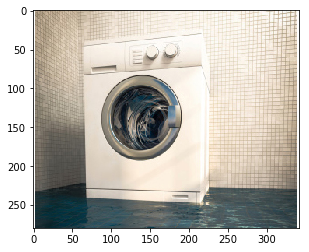

In [35]:
# CLAHE - contrast Limited Adaptive Histogram Equalization

B, G, R = cv2.split(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(B)
cl2 = clahe.apply(G)
cl3 = clahe.apply(R)
claheImage = cv2.merge((B, G, R))
print("Original Image")
plt.imshow(image)
plt.show()
print("Histogram Equalized Image")
plt.imshow(claheImage)
plt.show()

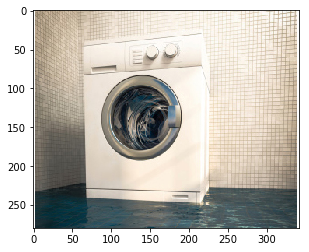

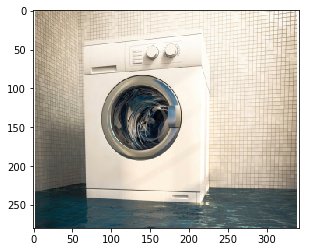

In [42]:
# Saturation

img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
loader_transform = transforms.ColorJitter(saturation=1)
imgOut = loader_transform(img)
numpy_image = np.array(imgOut)
imgOut=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR) 
plt.imshow(image)
plt.show()
plt.imshow(imgOut)
plt.show()

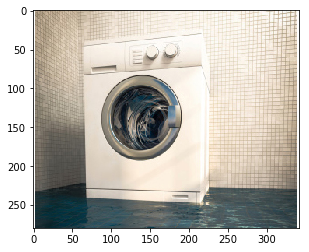

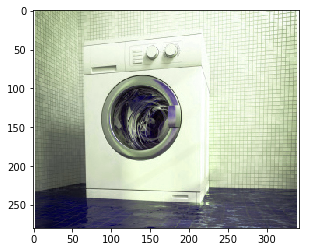

In [44]:
# Hue

img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
loader_transform = transforms.ColorJitter(hue=0.2)
imgOut = loader_transform(img)
numpy_image = np.array(imgOut)  
imgOut=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR) 
plt.imshow(image)
plt.show()
plt.imshow(imgOut)
plt.show()

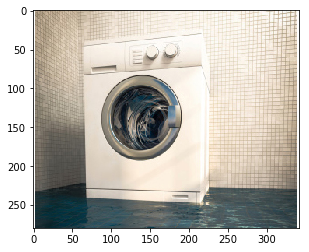

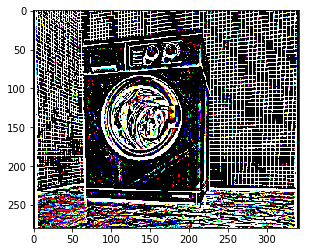

In [45]:
# Adaptive Guassian Thresholding

plt.imshow(image)
plt.show()

B ,G ,R = cv2.split(image)
B = cv2.adaptiveThreshold(B, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY_INV, 11, 2)
G = cv2.adaptiveThreshold(G, 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY_INV, 11, 2)
R = cv2.adaptiveThreshold(R, 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY_INV, 11, 2)
imgOut = cv2.merge([B, G, R])

plt.imshow(imgOut)
plt.show()

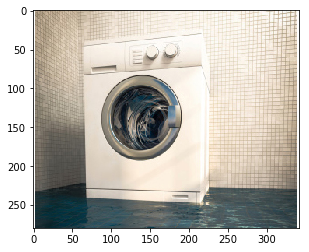

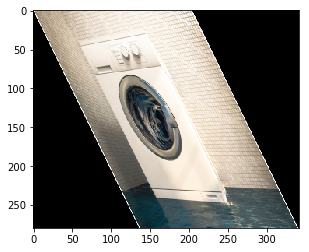

In [46]:
# Affine Transformation

plt.imshow(image)
plt.show()

rows, cols = image.shape[:2]
src = np.float32([[0, 0 ],
                 [cols - 1 , 0],
                 [ 0 ,rows - 1 ]])

dst = np.float32([[0, 0],
                 [int(0.6 * (cols - 1 )), 0],
                 [int(0.4 * (cols - 1 )), rows - 1 ]])

affine = cv2.getAffineTransform(src, dst)
transformed = cv2.warpAffine(image, affine, (cols,rows))

plt.imshow(transformed)
plt.show()

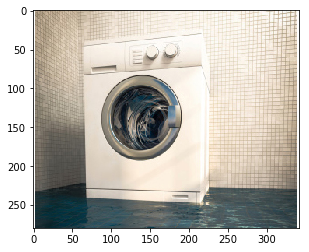

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


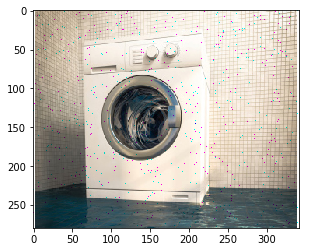

In [47]:
# Salt and pepper noise

plt.imshow(image)
plt.show()

row, col, ch = image.shape
s_vs_p = 0.5
amount = 0.004
out = np.copy(image)

# salt noise
num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, 
                            i - 1,
                            int(num_salt)) for i in image.shape]
out[coords] = 1

# pepper noise

num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords = [np.random.randint(0,
                            i - 1,
                            int(num_pepper)) for i in image.shape]
out[coords] = 0

plt.imshow(out)
plt.show()

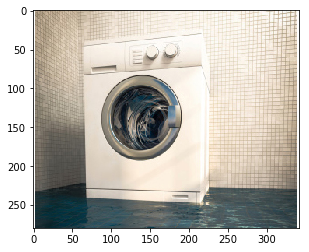

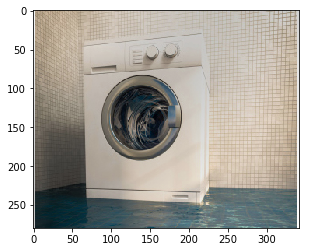

In [48]:
# Parallel light

def generate_parallel_light_mask(mask_size,
                                 max_brightness=255,
                                 min_brightness=0,
                                 mode="gaussian"):

    
    pos_x = random.randint(0, mask_size[0])
    pos_y = random.randint(0, mask_size[1])
    
    direction = random.randint(0, 360)
        
    padding = int(max(mask_size) * np.sqrt(2))
    canvas_x = padding * 2 + mask_size[0]
    canvas_y = padding * 2 + mask_size[1]
    mask = np.zeros(shape=(canvas_y, canvas_x), dtype=np.float32)
    init_mask_ul = (int(padding), int(padding))
    init_mask_br = (int(padding+mask_size[0]), int(padding+mask_size[1]))
    init_light_pos = (padding + pos_x, padding + pos_y)
    
    for i in range(canvas_y):
        i_value = _decayed_value_in_norm(i, max_brightness, min_brightness, init_light_pos[1], mask_size[1])
        mask[i] = i_value
        
    rotate_M = cv2.getRotationMatrix2D(init_light_pos, direction, 1)
    mask = cv2.warpAffine(mask, rotate_M, (canvas_x,  canvas_y))

    mask = mask[init_mask_ul[1]:init_mask_br[1], init_mask_ul[0]:init_mask_br[0]]
    mask = np.asarray(mask, dtype=np.uint8)

    mask = cv2.medianBlur(mask, 9)
    mask = 255 - mask
    
    return mask

def _decayed_value_in_norm(x, max_value, min_value, center, range):

    radius = range / 3
    center_prob = norm.pdf(center, center, radius)
    x_prob = norm.pdf(x, center, radius)
    x_value = (x_prob / center_prob) * (max_value - min_value) + min_value
    return x_value

def _decayed_value_in_linear(x, max_value, padding_center, decay_rate):

    x_value = max_value - abs(padding_center - x) * decay_rate
    if x_value < 0:
        x_value = 1
    return x_value

frame = image
plt.imshow(frame)
plt.show()

transparency = random.uniform(0.5, 0.85)
height, width, _ = frame.shape
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = generate_parallel_light_mask(mask_size=(width, height),
                                    max_brightness = 255,
                                    min_brightness = 0,
                                    mode = "gaussian")
hsv[:, :, 2] = hsv[:, :, 2] * transparency + mask * (1 - transparency)
frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
frame[frame > 255] = 255
frame = np.asarray(frame, dtype=np.uint8)

plt.imshow(frame)
plt.show()

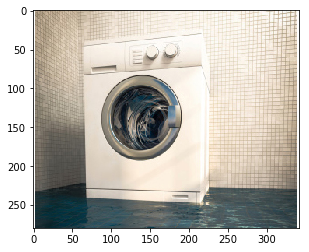

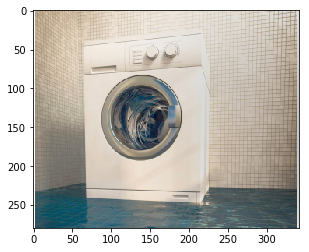

False

In [49]:
# Spot light

def generate_spot_light_mask(mask_size,
                             max_brightness = 255,
                             min_brightness = 0,
                             mode = "gaussian",
                             speedup = False):

    position = [(random.randint(0, mask_size[0]), random.randint(0, mask_size[1]))]

    mask = np.zeros(shape=(mask_size[1], mask_size[0]), dtype=np.float32)
    
    mu = np.sqrt(mask.shape[0]**2+mask.shape[1]**2)
    dev = mu / 3.5
    mask = _decay_value_radically_norm_in_matrix(mask_size, position, max_brightness, min_brightness, dev)
    mask = np.asarray(mask, dtype=np.uint8)
    
    mask = cv2.medianBlur(mask, 5)
    mask = 255 - mask
    
    return mask

def _decay_value_radically_norm_in_matrix(mask_size, centers, max_value, min_value, dev):

    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = np.zeros((mask_size[1], mask_size[0]))
    
    for center in centers:
        coord_x = np.arange(mask_size[0])
        coord_y = np.arange(mask_size[1])
        xv, yv = np.meshgrid(coord_x, coord_y)
        
        dist_x = xv - center[0]
        dist_y = yv - center[1]
        dist = np.sqrt(np.power(dist_x, 2) + np.power(dist_y, 2))
        
        x_value_rate += norm.pdf(dist, 0, dev) / center_prob

    mask = x_value_rate * (max_value - min_value) + min_value
    mask[mask > 255] = 255
    
    return mask

def _decay_value_radically_norm(x, centers, max_value, min_value, dev):

    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = 0
    
    for center in centers:
        distance = np.sqrt((center[0]-x[0])**2 + (center[1]-x[1])**2)
        x_value_rate += norm.pdf(distance, 0, dev) / center_prob
        
    x_value = x_value_rate * (max_value - min_value) + min_value
    x_value = 255 if x_value > 255 else x_value
    
    return x_value

frame = image
plt.imshow(frame)
plt.show()

height, width, _ = frame.shape
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = generate_spot_light_mask(mask_size=(width, height),
                                max_brightness = 255,
                                min_brightness = 0,
                                mode = "gaussian")
hsv[:, :, 2] = hsv[:, :, 2] * transparency + mask * (1 - transparency)
frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
frame[frame > 255] = 255
frame = np.asarray(frame, dtype=np.uint8)

plt.imshow(frame)
plt.show()

cv2.imwrite("/home/yashk2000/outputs/spotLight.jpg", frame)

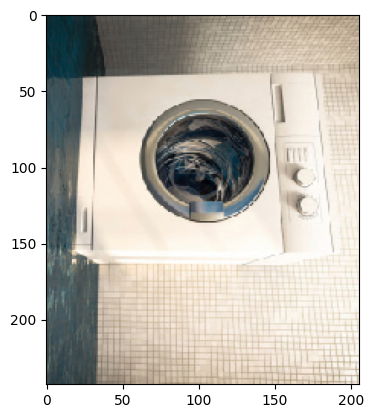

In [5]:
# rotation of image to 90^

imgRot90=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(imgRot90)
plt.show()

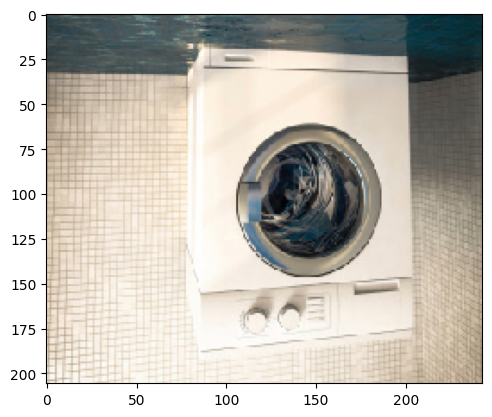

In [6]:
# rotation of image to 180^

imgRot180=cv2.rotate(image,cv2.ROTATE_180)
plt.imshow(imgRot180)
plt.show()

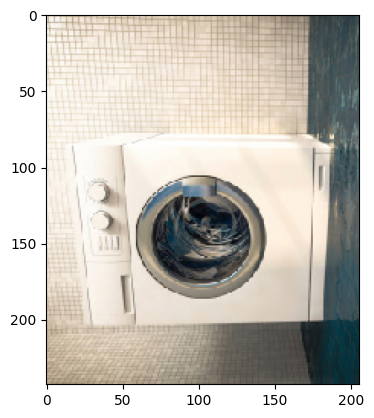

In [7]:
# rotation of image to 270^

imgRot270=cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(imgRot270)
plt.show()

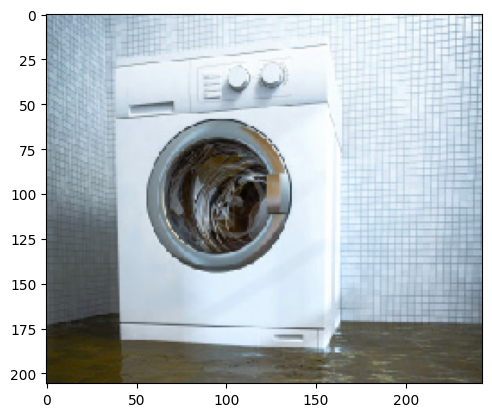

In [4]:
# bgr image

image=cv2.imread(path)
plt.imshow(image)
plt.show()

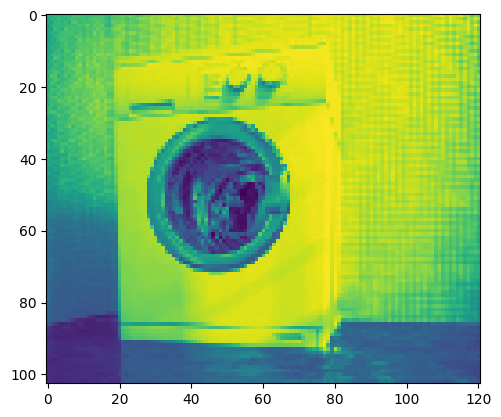

In [4]:
# rgb image
imgRGB=cv2.imread(path,cv2.COLOR_BAYER_BG2RGB)
plt.imshow(imgRGB)
plt.show()

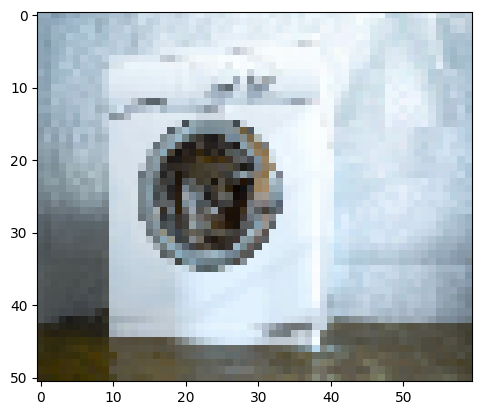

In [6]:
#LAB image
imgLAB=cv2.imread(path,cv2.COLOR_BGR2LAB)
plt.imshow(imgLAB)
plt.show()

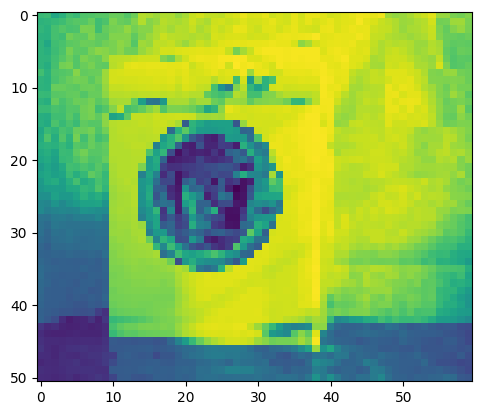

In [7]:
#xyz image

imgXYZ=cv2.imread(path,cv2.COLOR_BGR2XYZ)
plt.imshow(imgXYZ)
plt.show()

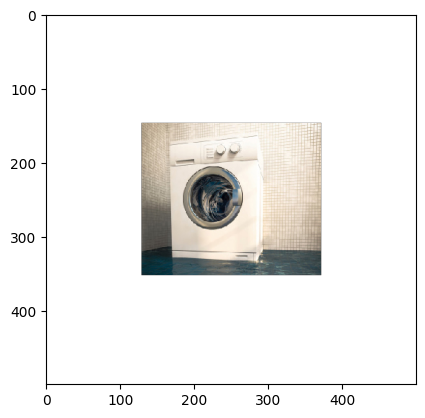

In [4]:
# center crop

img = Image.open(path)
width, height = img.size
center_x = width // 2
center_y = height // 2
crop_size = 500
left = center_x - crop_size // 2
top = center_y - crop_size // 2
right = center_x + crop_size // 2
bottom = center_y + crop_size // 2
img_cropped = img.crop((left, top, right, bottom))
plt.imshow(img_cropped)
plt.show()

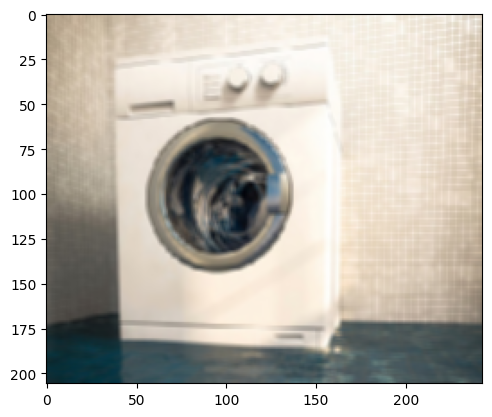

In [4]:
# mean blur of image
kernel_size = 3
mean_filtered = cv2.blur(image, (kernel_size, kernel_size)) 
plt.imshow(mean_filtered)
plt.show()

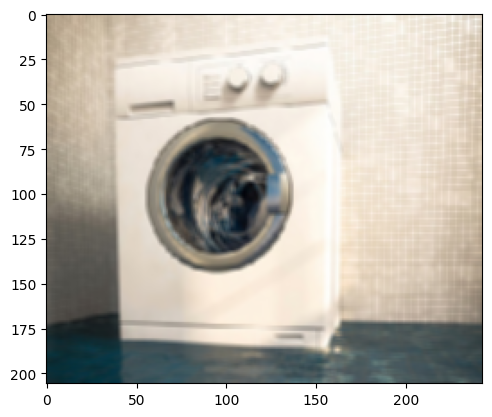

In [5]:
#median blur
kernel_size = 3
median_filtered = cv2.medianBlur(image, kernel_size)
plt.imshow(mean_filtered)
plt.show()